# Solar Data Cleaning and EDA for Benin
Week 0 Challenge - 10 Academy AIM

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

In [3]:
# Create directory for plots if it doesn't exist
os.makedirs('plots/benin', exist_ok=True)
# Create directory for data if it doesn't exist
os.makedirs('data', exist_ok=True)

## 1. Load the data

In [6]:
print("Loading data...")
file_path = 'data/benin-malanville.csv'
df = pd.read_csv(file_path)

# First look at the data
print("\nFirst 5 rows of the dataset:")
df.head()

Loading data...

First 5 rows of the dataset:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [7]:
print("Dataset shape:", df.shape)

Dataset shape: (525600, 19)


## 2. Summary Statistics & Missing-Value Report

In [8]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print("\nDataset time range:", df['Timestamp'].min(), "to", df['Timestamp'].max())


Dataset time range: 2021-08-09 00:01:00 to 2022-08-09 00:00:00


In [9]:
# Summary statistics
print("\nSummary statistics:")
summary_stats = df.describe()
summary_stats


Summary statistics:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


In [10]:
# Missing values analysis
print("\nMissing values analysis:")
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_df[missing_df['Percentage'] > 0]


Missing values analysis:


,Missing Values,Percentage
Comments,525600,100.0


In [ ]:
columns_high_missing = missing_df[missing_df['Percentage'] > 5].index.tolist()
if columns_high_missing:
    print(f"\nColumns with >5% missing values: {columns_high_missing}")
else:
    print("\nNo columns with >5% missing values.")

## 3. Outlier Detection & Basic Cleaning

In [12]:
# Function to calculate z-scores and identify outliers
def detect_outliers(df, columns, z_threshold=3):
    outliers_info = {}
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers_mask = z_scores > z_threshold
        outliers_count = np.sum(outliers_mask)
        outliers_percentage = (outliers_count / len(z_scores)) * 100
        outliers_info[col] = {
            'count': outliers_count,
            'percentage': outliers_percentage
        }
    return outliers_info

In [13]:
# Numeric columns to check for outliers
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Check for outliers
print("\nOutlier detection (|Z-score| > 3):")
outliers_info = detect_outliers(df, numeric_cols)
for col, info in outliers_info.items():
    print(f"{col}: {info['count']} outliers ({info['percentage']:.2f}%)")


Outlier detection (|Z-score| > 3):
GHI: 89 outliers (0.02%)
DNI: 0 outliers (0.00%)
DHI: 3738 outliers (0.71%)
ModA: 27 outliers (0.01%)
ModB: 63 outliers (0.01%)
WS: 3109 outliers (0.59%)
WSgust: 3500 outliers (0.67%)


In [14]:
# Create a copy for cleaning
df_clean = df.copy()

# Replace outliers with NaN
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df_clean[col].dropna()))
    outliers_mask = z_scores > 3
    df_clean.loc[df_clean[col].dropna().index[outliers_mask], col] = np.nan

# Impute missing values with median for key columns
for col in numeric_cols:
    median_value = df_clean[col].median()
    df_clean[col].fillna(median_value, inplace=True)

In [ ]:
# Check for negative GHI, DNI, DHI values
print("\nNegative values in solar radiation measurements:")
for col in ['GHI', 'DNI', 'DHI']:
    neg_count = (df_clean[col] < 0).sum()
    neg_percentage = (neg_count / len(df_clean)) * 100
    print(f"{col}: {neg_count} negative values ({neg_percentage:.2f}%)")


Negative values in solar radiation measurements:
GHI: 258847 negative values (49.25%)
DNI: 275987 negative values (52.51%)
DHI: 259182 negative values (49.31%)


In [16]:
# Set negative solar radiation values to 0 during nighttime
# Define daytime: 6 AM to 6 PM
df_clean['hour'] = df_clean['Timestamp'].dt.hour
daytime_mask = (df_clean['hour'] >= 6) & (df_clean['hour'] <= 18)
nighttime_mask = ~daytime_mask

# Set negative values during nighttime to 0
for col in ['GHI', 'DNI', 'DHI']:
    # Only during nighttime, negative values are expected
    df_clean.loc[nighttime_mask & (df_clean[col] < 0), col] = 0
    # During daytime, negative values could be sensor errors, replace with 0
    df_clean.loc[daytime_mask & (df_clean[col] < 0), col] = 0

In [17]:
# Save cleaned data
print("\nSaving cleaned data...")
df_clean.to_csv('data/benin_clean.csv', index=False)
print("Cleaned data saved to data/benin_clean.csv")


Saving cleaned data...
Cleaned data saved to data/benin_clean.csv


## 4. Time Series Analysis

In [18]:
# Aggregate data by day to make visualizations more manageable
df_daily = df_clean.groupby(df_clean['Timestamp'].dt.date).agg({
    'GHI': 'mean',
    'DNI': 'mean',
    'DHI': 'mean',
    'Tamb': 'mean'
}).reset_index()
df_daily['Timestamp'] = pd.to_datetime(df_daily['Timestamp'])

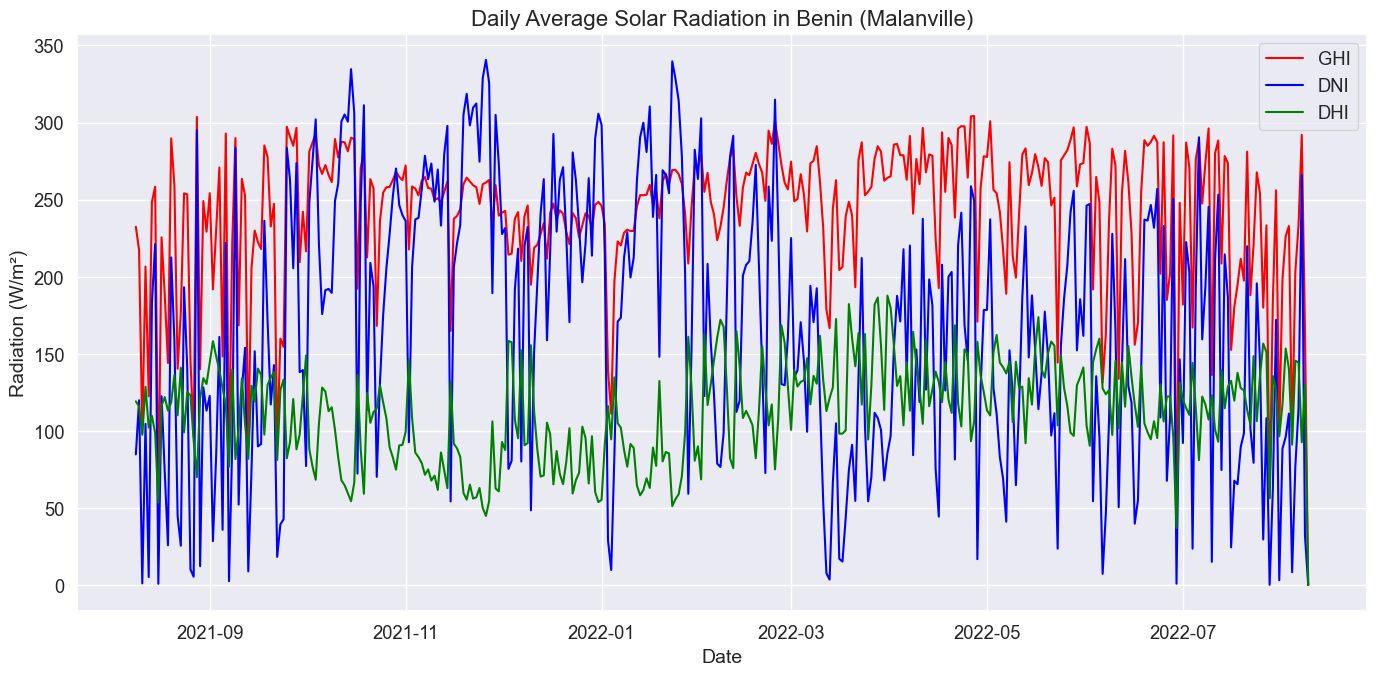

In [19]:
# Plot daily averages
plt.figure(figsize=(14, 7))
plt.plot(df_daily['Timestamp'], df_daily['GHI'], label='GHI', color='red')
plt.plot(df_daily['Timestamp'], df_daily['DNI'], label='DNI', color='blue')
plt.plot(df_daily['Timestamp'], df_daily['DHI'], label='DHI', color='green')
plt.title('Daily Average Solar Radiation in Benin (Malanville)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Radiation (W/m²)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('plots/benin/daily_solar_radiation.png')
plt.show()

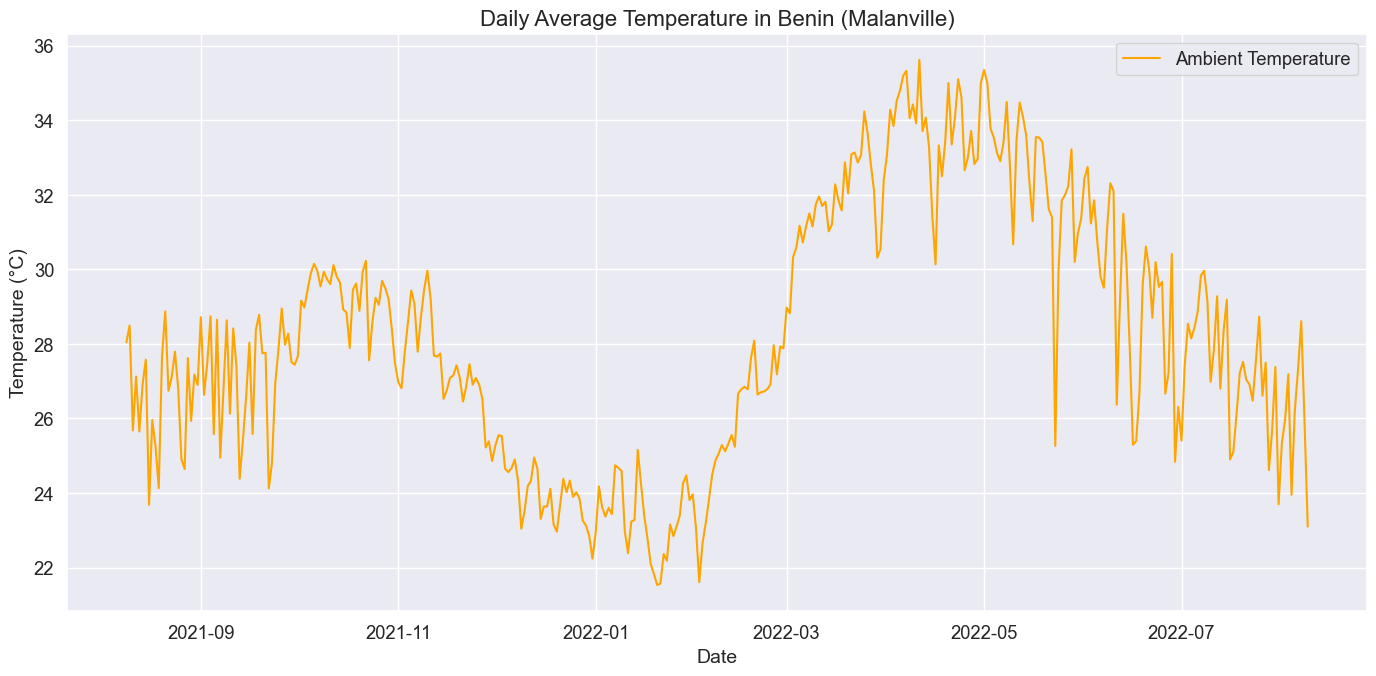

In [20]:
# Plot temperature
plt.figure(figsize=(14, 7))
plt.plot(df_daily['Timestamp'], df_daily['Tamb'], label='Ambient Temperature', color='orange')
plt.title('Daily Average Temperature in Benin (Malanville)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('plots/benin/daily_temperature.png')
plt.show()

In [21]:
# Monthly aggregation
df_clean['month'] = df_clean['Timestamp'].dt.month
df_monthly = df_clean.groupby('month').agg({
    'GHI': 'mean',
    'DNI': 'mean',
    'DHI': 'mean',
    'Tamb': 'mean'
}).reset_index()

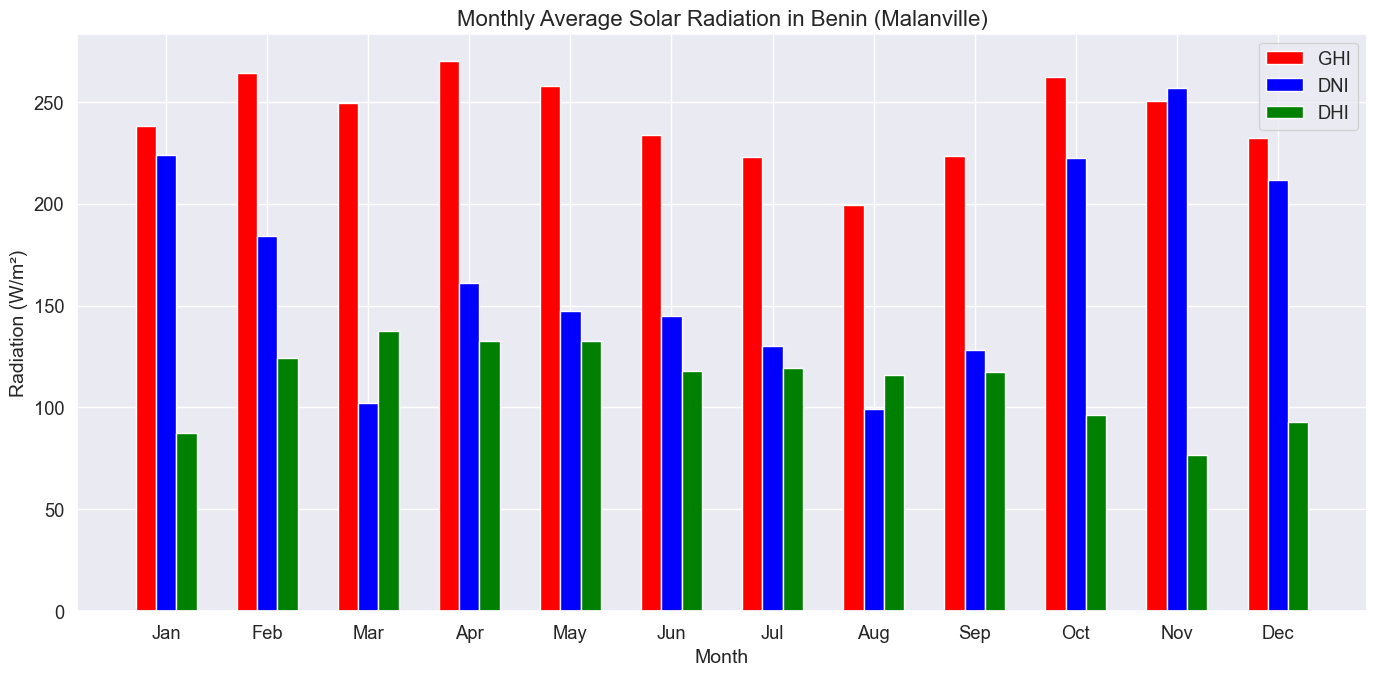

In [22]:
# Plot monthly averages
plt.figure(figsize=(14, 7))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = np.arange(len(months))
width = 0.2

plt.bar(x - width, df_monthly['GHI'], width, label='GHI', color='red')
plt.bar(x, df_monthly['DNI'], width, label='DNI', color='blue')
plt.bar(x + width, df_monthly['DHI'], width, label='DHI', color='green')

plt.title('Monthly Average Solar Radiation in Benin (Malanville)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Radiation (W/m²)', fontsize=14)
plt.xticks(x, months)
plt.legend()
plt.tight_layout()
plt.savefig('plots/benin/monthly_solar_radiation.png')
plt.show()

## 5. Cleaning Impact Analysis

In [23]:
# Group by Cleaning flag
cleaning_impact = df_clean.groupby('Cleaning').agg({
    'ModA': 'mean',
    'ModB': 'mean'
}).reset_index()

print("\nAverage ModA and ModB values by Cleaning status:")
cleaning_impact


Average ModA and ModB values by Cleaning status:


,Cleaning,ModA,ModB
0,0,236.459225,228.669520
1,1,307.229278,301.972165


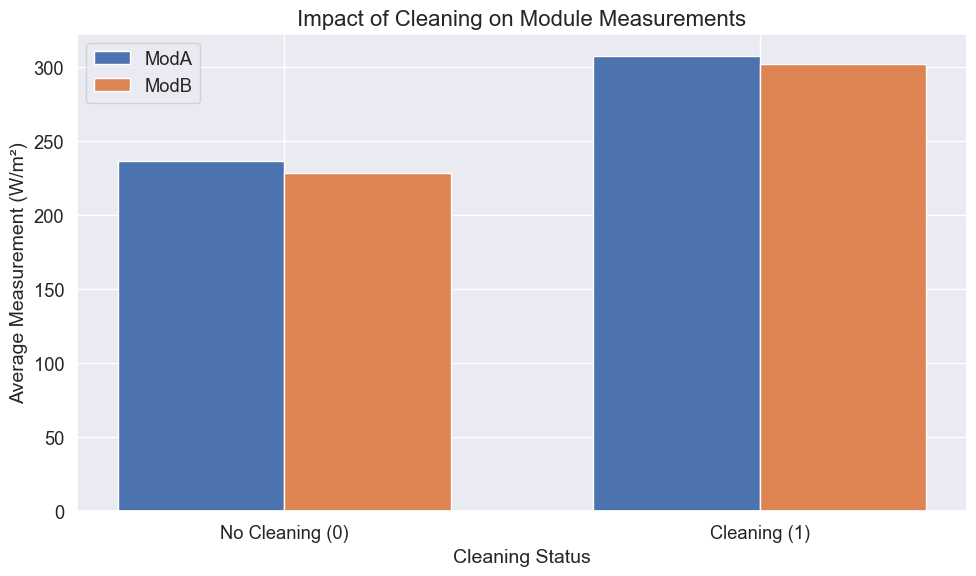

In [24]:
# Plot cleaning impact
x = ['No Cleaning (0)', 'Cleaning (1)']
x_pos = np.arange(len(x))
width = 0.35

# Check if we have both cleaning states (0 and 1)
if len(cleaning_impact) >= 2:
    plt.figure(figsize=(10, 6))
    plt.bar(x_pos - width/2, cleaning_impact['ModA'], width, label='ModA')
    plt.bar(x_pos + width/2, cleaning_impact['ModB'], width, label='ModB')
    plt.title('Impact of Cleaning on Module Measurements', fontsize=16)
    plt.xlabel('Cleaning Status', fontsize=14)
    plt.ylabel('Average Measurement (W/m²)', fontsize=14)
    plt.xticks(x_pos, x)
    plt.legend()
    plt.tight_layout()
    plt.savefig('plots/benin/cleaning_impact.png')
    plt.show()
else:
    print("Not enough data to plot cleaning impact (need both cleaning states 0 and 1)")

## 6. Correlation & Relationship Analysis

In [25]:
# Calculate correlations
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'BP']
corr_matrix = df_clean[corr_columns].corr()

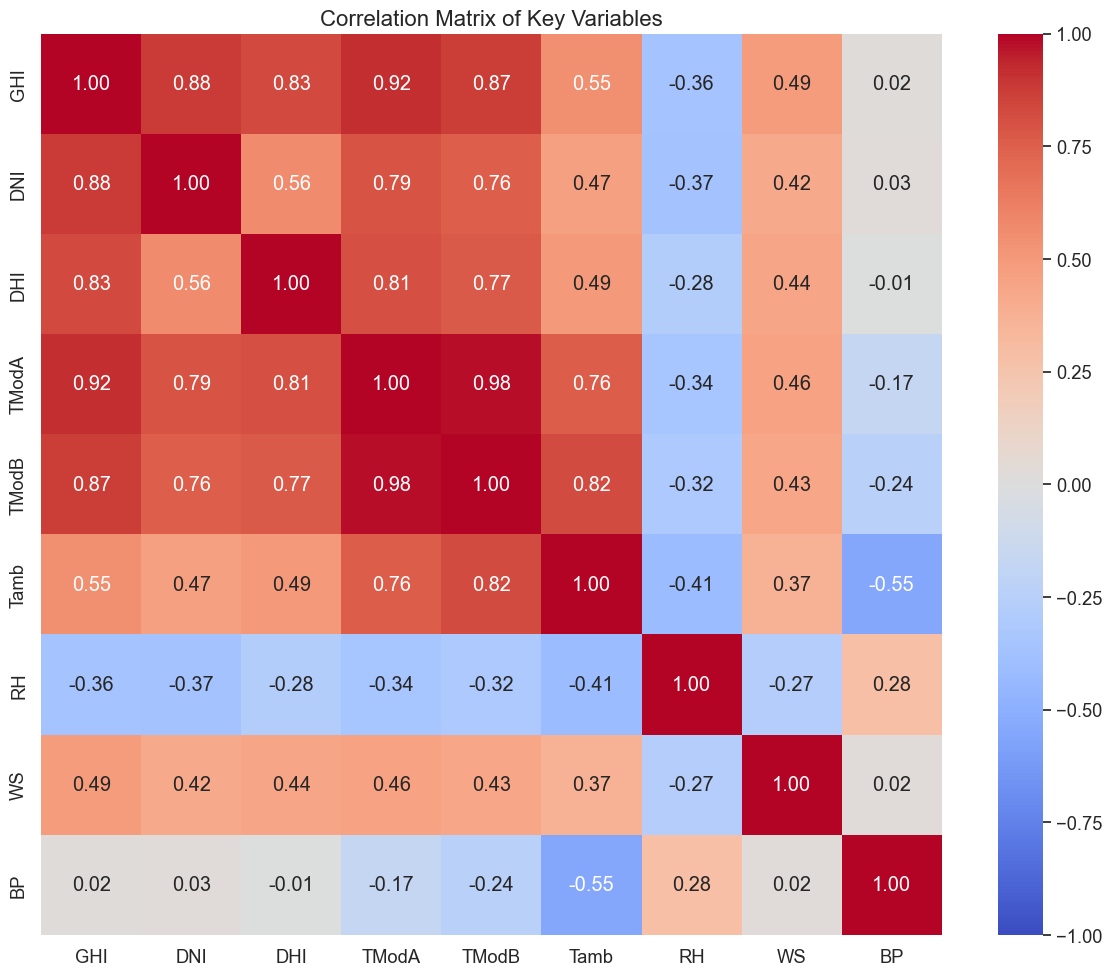

In [26]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Key Variables', fontsize=16)
plt.tight_layout()
plt.savefig('plots/benin/correlation_heatmap.png')
plt.show()

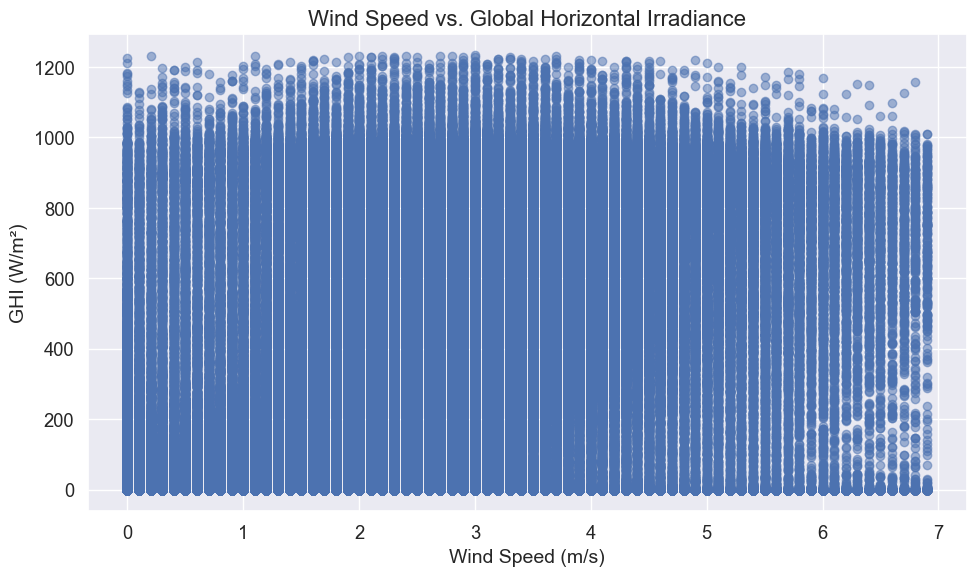

In [27]:
# Scatter plots
# WS vs GHI
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['WS'], df_clean['GHI'], alpha=0.5)
plt.title('Wind Speed vs. Global Horizontal Irradiance', fontsize=16)
plt.xlabel('Wind Speed (m/s)', fontsize=14)
plt.ylabel('GHI (W/m²)', fontsize=14)
plt.tight_layout()
plt.savefig('plots/benin/ws_vs_ghi.png')
plt.show()

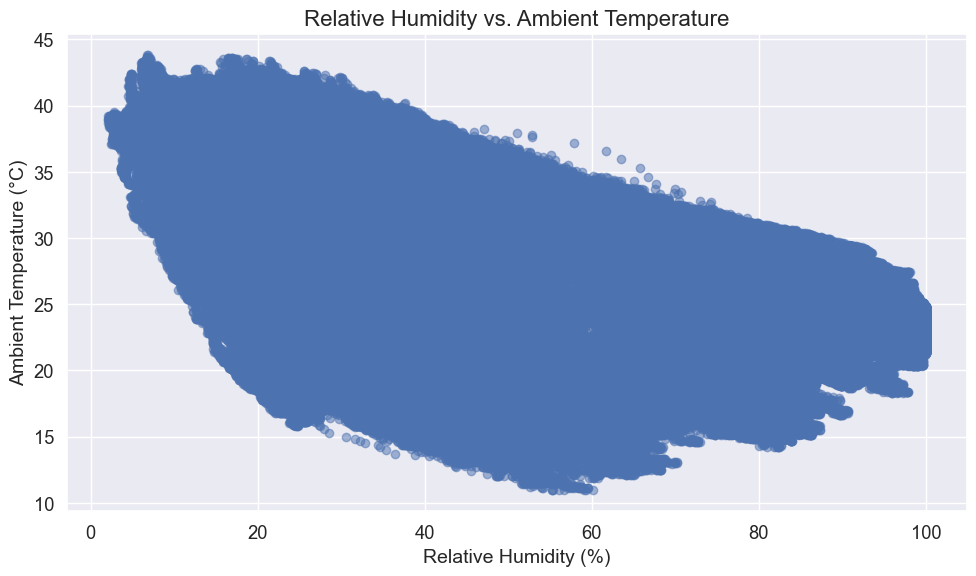

In [28]:
# RH vs Tamb
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.5)
plt.title('Relative Humidity vs. Ambient Temperature', fontsize=16)
plt.xlabel('Relative Humidity (%)', fontsize=14)
plt.ylabel('Ambient Temperature (°C)', fontsize=14)
plt.tight_layout()
plt.savefig('plots/benin/rh_vs_tamb.png')
plt.show()

## 7. Wind & Distribution Analysis

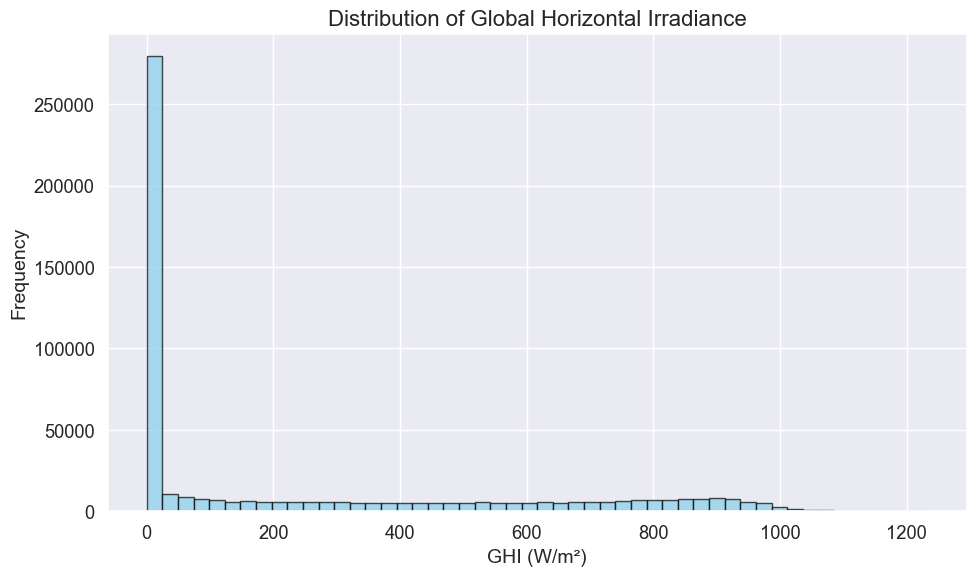

In [29]:
# Histogram for GHI
plt.figure(figsize=(10, 6))
plt.hist(df_clean['GHI'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Global Horizontal Irradiance', fontsize=16)
plt.xlabel('GHI (W/m²)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.savefig('plots/benin/ghi_histogram.png')
plt.show()

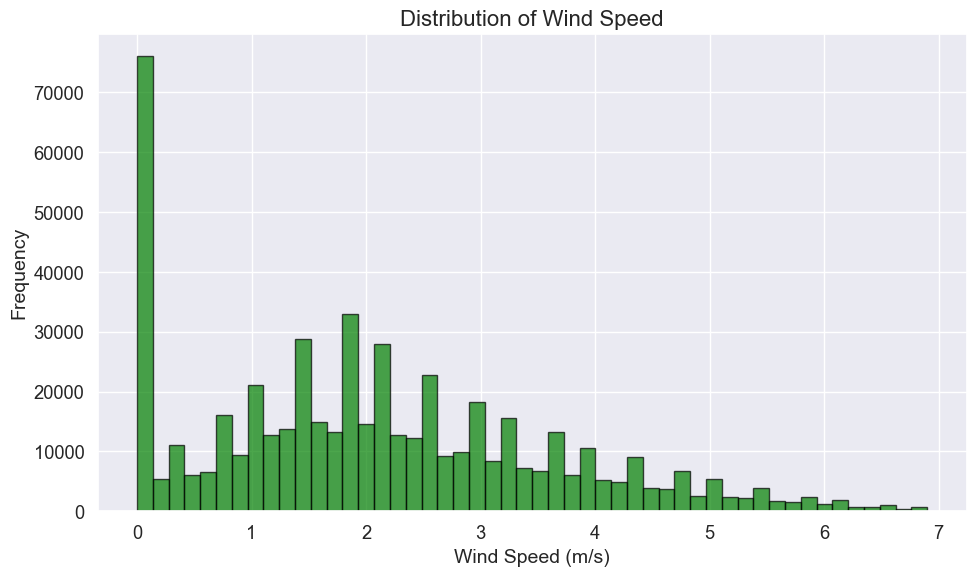

In [30]:
# Histogram for WS
plt.figure(figsize=(10, 6))
plt.hist(df_clean['WS'], bins=50, alpha=0.7, color='green', edgecolor='black')
plt.title('Distribution of Wind Speed', fontsize=16)
plt.xlabel('Wind Speed (m/s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.savefig('plots/benin/ws_histogram.png')
plt.show()

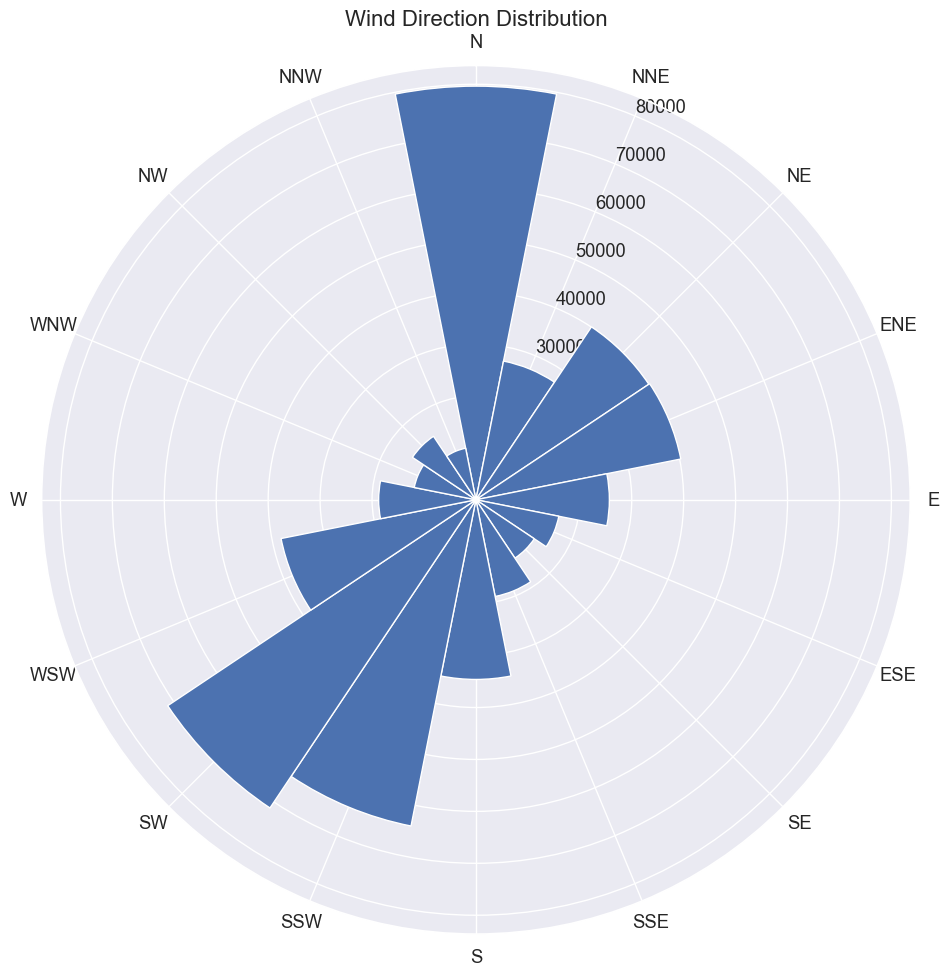

In [ ]:
# Wind Rose Plot
plt.figure(figsize=(10, 10))
# Bin wind directions into 16 sectors
bins = np.arange(0, 361, 22.5)
df_clean['WD_bin'] = pd.cut(df_clean['WD'], bins=bins, right=False, include_lowest=True)
wind_counts = df_clean.groupby('WD_bin').size()

# Plot
ax = plt.subplot(111, polar=True)
theta = np.linspace(0, 2*np.pi, len(wind_counts), endpoint=False)
radii = wind_counts.values
width = 2*np.pi / len(wind_counts)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Set the direction labels
direction_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 
                    'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)  # Clockwise
ax.set_thetagrids(np.degrees(theta), direction_labels)

plt.title('Wind Direction Distribution', fontsize=16)
plt.tight_layout()
plt.savefig('plots/benin/wind_rose.png')
plt.show()

## 8. Temperature Analysis

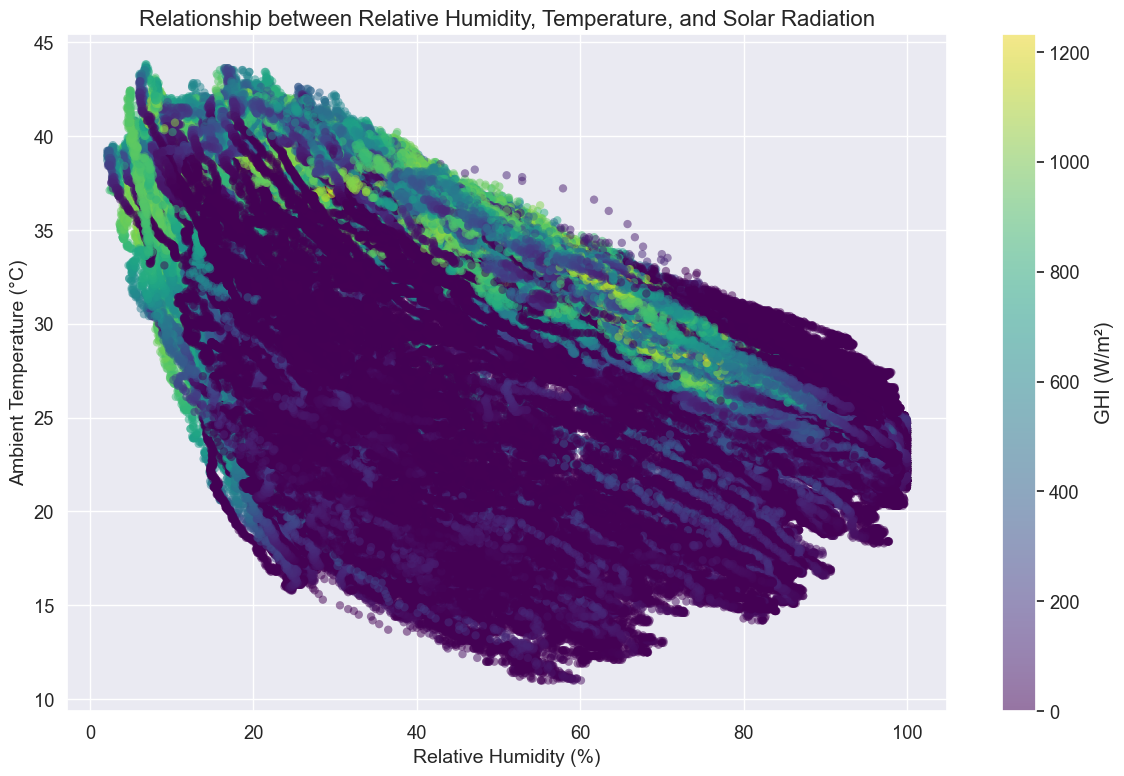

In [32]:
# Create a figure with RH vs Temperature colored by GHI
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_clean['RH'], df_clean['Tamb'], 
                     c=df_clean['GHI'], cmap='viridis', 
                     alpha=0.5, edgecolors='none')
plt.colorbar(scatter, label='GHI (W/m²)')
plt.title('Relationship between Relative Humidity, Temperature, and Solar Radiation', fontsize=16)
plt.xlabel('Relative Humidity (%)', fontsize=14)
plt.ylabel('Ambient Temperature (°C)', fontsize=14)
plt.tight_layout()
plt.savefig('plots/benin/rh_tamb_ghi.png')
plt.show()

## 9. Bubble Chart

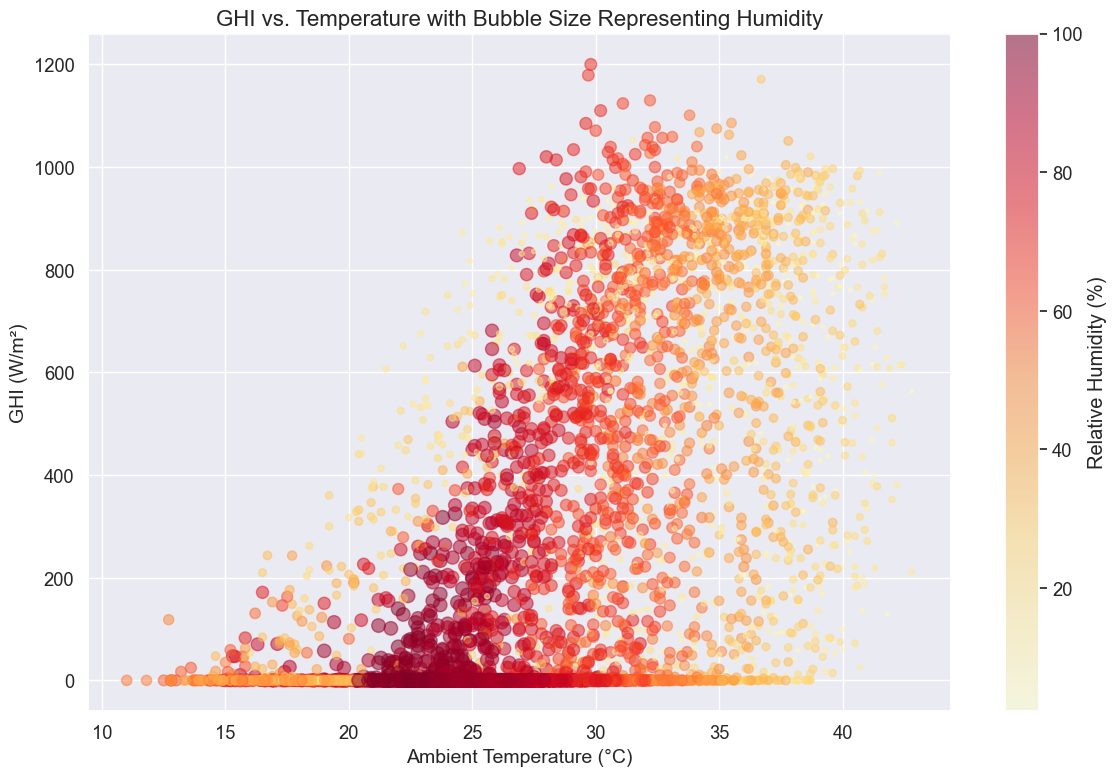

In [33]:
# Sample the data to make the plot more readable (every 100th point)
sample_df = df_clean.iloc[::100].copy()

plt.figure(figsize=(12, 8))
bubble = plt.scatter(sample_df['Tamb'], sample_df['GHI'], 
                    s=sample_df['RH'], alpha=0.5, 
                    c=sample_df['RH'], cmap='YlOrRd')
plt.colorbar(bubble, label='Relative Humidity (%)')
plt.title('GHI vs. Temperature with Bubble Size Representing Humidity', fontsize=16)
plt.xlabel('Ambient Temperature (°C)', fontsize=14)
plt.ylabel('GHI (W/m²)', fontsize=14)
plt.tight_layout()
plt.savefig('plots/benin/tamb_ghi_rh_bubble.png')
plt.show()

## Summary

In this notebook, we performed a comprehensive exploratory data analysis on solar radiation data from Benin (Malanville). We:

1. Loaded and examined the data structure
2. Analyzed summary statistics and missing values
3. Detected and handled outliers
4. Cleaned the data by handling negative values and imputing missing values
5. Performed time series analysis to identify daily and monthly patterns
6. Examined the impact of cleaning on module measurements
7. Analyzed correlations between key variables
8. Explored wind patterns and distributions
9. Investigated the relationship between temperature, humidity, and solar radiation
10. Created advanced visualizations like bubble charts

The cleaned data has been saved to 'data/benin_clean.csv' for further analysis and comparison with other countries.